In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('walmart_stock.csv')
#df = pd.read_csv('walmart_stock.csv', index_col='Date')
#Can also add the Date as the index here but still as a string so you'd have to convert it 

In [ ]:
df = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates=True)
#This is the fastest way, if your data is already in expected format
#parse_dates converts dates to a datetime object while index_col makes date the index
#You can also add lists of cols you want to change in parse dates

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df.info()
#Shows that Date is still a string object so we need to convert that to a datetime object then index it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
#Incase the date format is not year-mon-day, use "%d/%m/%Y" after 'Date'
#df['Date'] = df['Date'].apply(pd.to_datetime) same result

In [7]:
df.info()
#Its now a datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()
#1st column 'Date' is now the index

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [10]:
#Resampling
#Serves as a groupby method specific to datetime objects
#There's a table for the rules letter n their meaning
df.resample(rule='A')#first arg is rule, A is year end frequency

In [12]:
df.resample(rule='A').mean()
#mean of yr end, so mean of all till year end

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [13]:
df.resample(rule='Q').mean()
#Q is quarterly resampling

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [14]:
df.resample(rule='BQ').mean()
#BQ is business quarterly resampling

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [15]:
df.resample(rule='A').max()
#The max price for that year, ending it at the end of the year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [16]:
def first_day(entry):
    return entry[0]

In [17]:
df.resample('A').apply(first_day)
#We can use our own custom functions too, this returns the index 0 of each year that's the first day
#A is just groupby annually

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

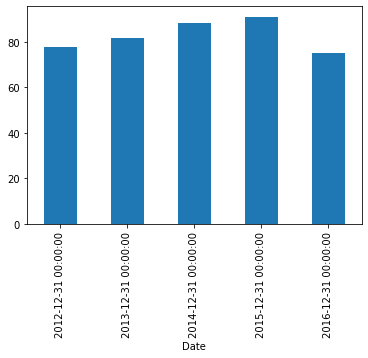

In [18]:
df['High'].resample('A').max().plot(kind='bar')
#Plots the maximum 'high' price each year

<AxesSubplot:xlabel='Date'>

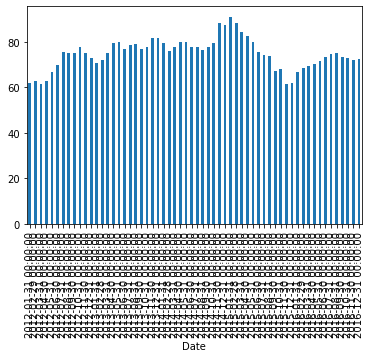

In [19]:
df['High'].resample('M').max().plot(kind='bar')#M is monthly, so in 5 yrs thats 60 months 60 bars

<AxesSubplot:xlabel='Date'>

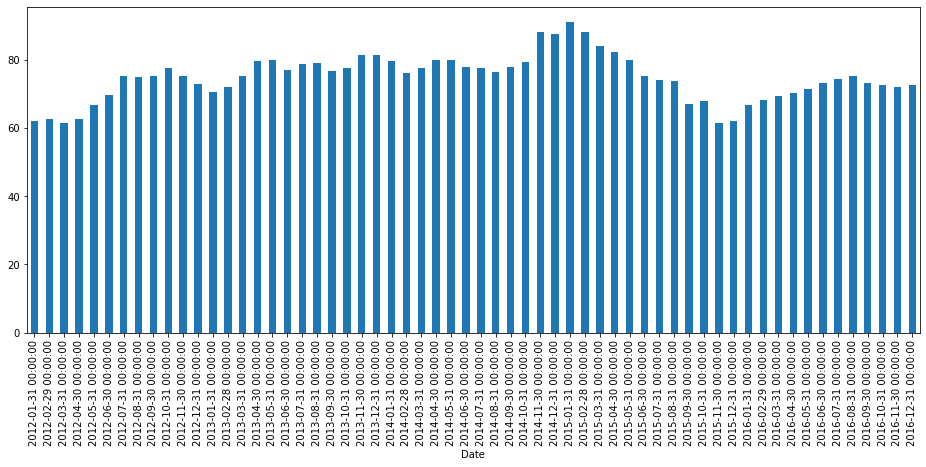

In [20]:
df['High'].resample('M').max().plot(kind='bar', figsize=(16,6))